In [1]:
# 1. Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1.

from skimage.io import imread
image = imread('data\\parrots.jpg')

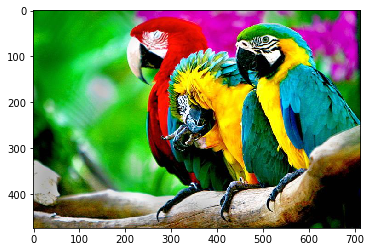

In [2]:
%matplotlib inline
import pylab
pylab.imshow(image)

In [3]:
image

array([[[  4, 126,   5],
        [  2, 126,   2],
        [  2, 126,   2],
        ..., 
        [  0,  56,   2],
        [  0,  53,   8],
        [  2,  55,  11]],

       [[  4, 126,   5],
        [  2, 126,   2],
        [  2, 126,   2],
        ..., 
        [  0,  54,   1],
        [  0,  53,   8],
        [  0,  52,   8]],

       [[  3, 125,   4],
        [  2, 126,   2],
        [  2, 126,   2],
        ..., 
        [  0,  54,   1],
        [  0,  52,   8],
        [  0,  51,   8]],

       ..., 
       [[121,  96,   4],
        [114,  91,   0],
        [115,  94,   3],
        ..., 
        [  8,  21,  27],
        [ 12,  26,  37],
        [ 13,  28,  47]],

       [[116,  89,   0],
        [122,  97,   5],
        [113,  90,   0],
        ..., 
        [  6,  21,  26],
        [ 18,  36,  48],
        [ 10,  28,  48]],

       [[126,  97,   5],
        [131, 105,  12],
        [121,  96,   3],
        ..., 
        [  6,  23,  30],
        [ 21,  41,  52],
        [ 19,  42,

In [4]:
from skimage import img_as_float
image = img_as_float(image)

In [5]:
image

array([[[ 0.01568627,  0.49411765,  0.01960784],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21960784,  0.00784314],
        [ 0.        ,  0.20784314,  0.03137255],
        [ 0.00784314,  0.21568627,  0.04313725]],

       [[ 0.01568627,  0.49411765,  0.01960784],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.00392157],
        [ 0.        ,  0.20784314,  0.03137255],
        [ 0.        ,  0.20392157,  0.03137255]],

       [[ 0.01176471,  0.49019608,  0.01568627],
        [ 0.00784314,  0.49411765,  0.00784314],
        [ 0.00784314,  0.49411765,  0.00784314],
        ..., 
        [ 0.        ,  0.21176471,  0.00392157],
        [ 0.        ,  0.20392157,  0.03137255],
        [ 0.        ,  0.2       ,  0.03137255]],

       ..., 
       [[ 0.4745098 ,  0.37647059,  0.01568627],
        

In [6]:
# 2. Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - 
# значениями интенсивности в пространстве RGB.

In [7]:
print(image.shape)

(474, 713, 3)


In [8]:
import pandas as pd
import numpy as np
w, h, d = image.shape
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=['R', 'G', 'B'])
pixels[:5]

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


In [9]:
# 3. Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. 
# После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: 
# медианным и средним цветом по кластеру.

# https://github.com/tyz910/hse-shad-ml/blob/master/14-statement-clustering/main.py

from sklearn.cluster import KMeans
from skimage.io import imsave

def get_clusters(pixels, n_clusters):
    print('n_clusters', n_clusters)

    pixels = pixels.copy()
    clf = KMeans(n_clusters=n_clusters, init='k-means++', random_state=241)
    pixels['cluster'] = clf.fit_predict(pixels)

    means = pixels.groupby('cluster').mean().values
    mean_pixels = [means[c] for c in pixels['cluster'].values]
    mean_image = np.reshape(mean_pixels, (w, h, d))
    pylab.imshow(mean_image)
    pylab.show()
    # imsave('images/mean/parrots_' + str(n_clusters) + '.jpg', mean_image)

    medians = pixels.groupby('cluster').median().values
    median_pixels = [medians[c] for c in pixels['cluster'].values]
    median_image = np.reshape(median_pixels, (w, h, d))
    pylab.imshow(median_image)
    pylab.show()    
    # imsave('images/median/parrots_' + str(n_clusters) + '.jpg', median_image)

    return mean_image, median_image

In [10]:
# 4. Измерьте качество получившейся сегментации с помощью метрики PSNR.
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    return 10 * np.log10(1.0 / mse)

n_clusters 1


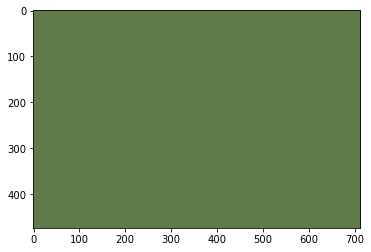

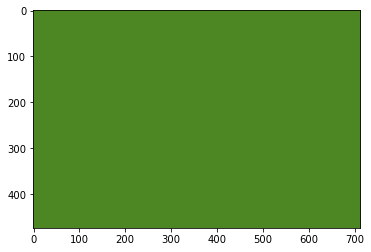

9.81883554477 9.42784046051
n_clusters 2


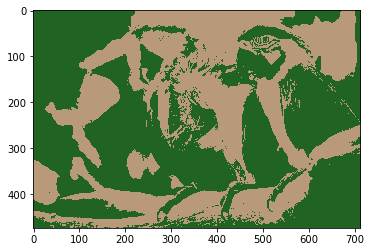

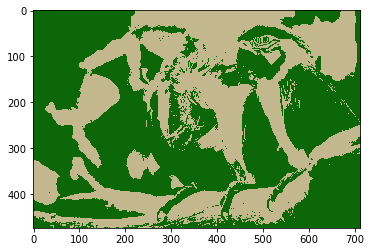

12.0801770849 11.6550772669
n_clusters 3


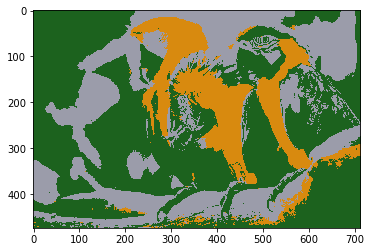

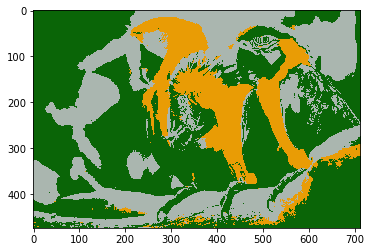

13.1534870446 12.7749481751
n_clusters 4


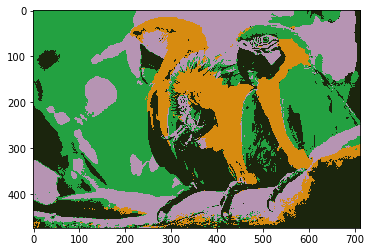

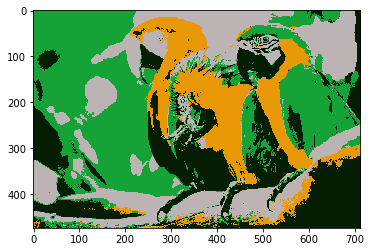

14.3678179409 14.0059287219
n_clusters 5


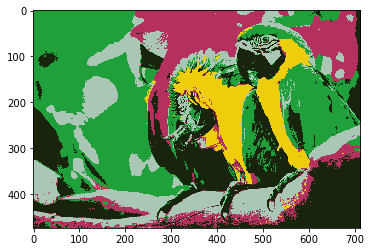

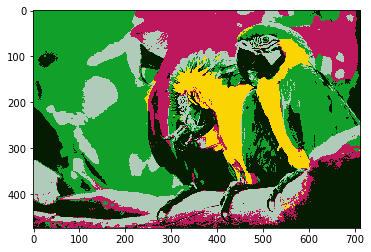

15.5271461973 15.1779090773
n_clusters 6


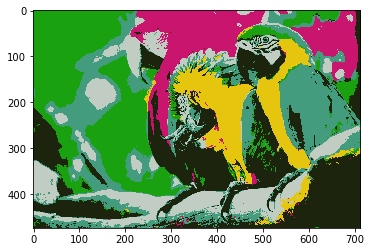

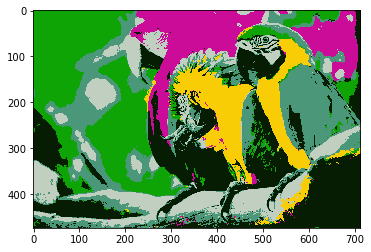

16.5439940966 16.0511767785
n_clusters 7


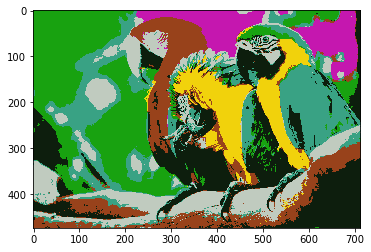

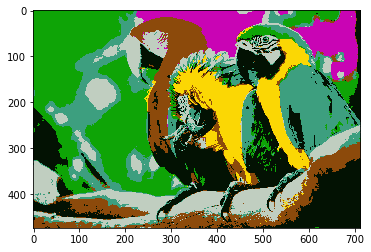

17.6409925086 17.3393684914
n_clusters 8


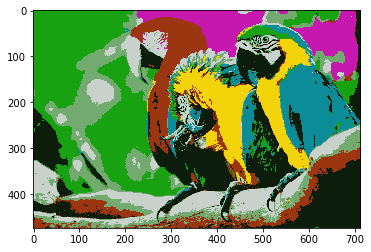

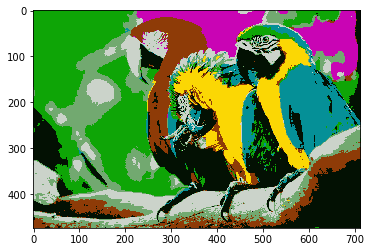

18.4368290141 18.1379714434
n_clusters 9


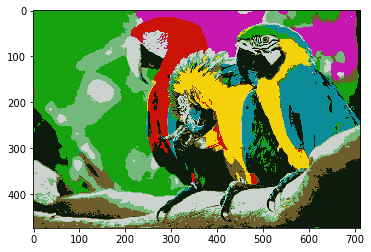

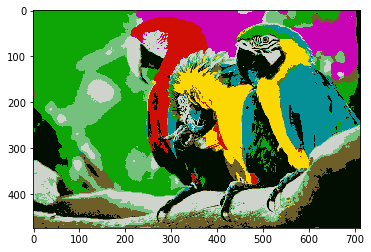

19.1126727358 18.8138873562
n_clusters 10


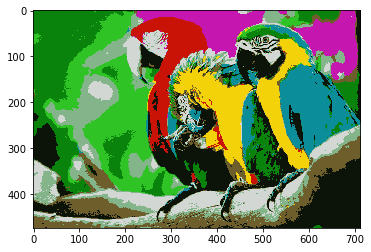

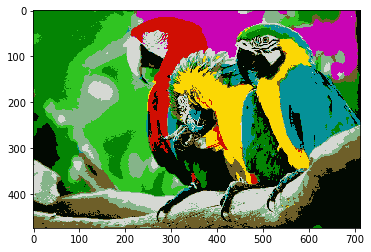

19.6407566359 19.4174725155
n_clusters 11


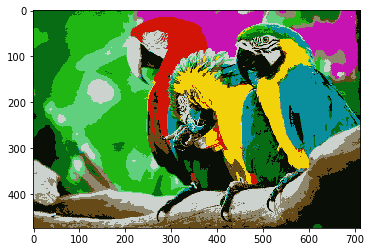

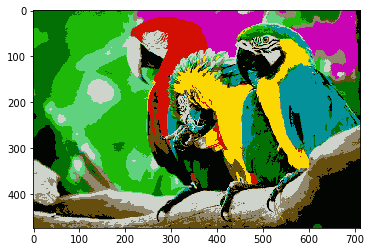

20.1275887465 19.8412840739
STOP 11


In [11]:
# 5. Найдите минимальное количество кластеров, при котором значение PSNR выше 20 
# (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). 

for n in range(1, 21):
    mean_image, median_image = get_clusters(pixels, n)
    psnr_mean, psnr_median = psnr(image, mean_image), psnr(image, median_image)
    print(psnr_mean, psnr_median)  
    
    if psnr_mean > 20 or psnr_median > 20:
        print('STOP', n)
        break
    